In [26]:
!pip install -q -U kaggle_environments

In [27]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

In [28]:
%%writefile rock_agent.py

#Example of the simple agent
#0 - rock
#1 - paper
#2 - scissors
def your_agent(observation, configuration):
    return 0

Overwriting rock_agent.py


In [29]:
%%writefile paper.py

#strategy with only papers
def paper(observation, configuration):
    return 1

Overwriting paper.py


In [30]:
%%writefile scissors.py

# strategy with only scissors
def scissors(observation, configuration):
    return 2

Overwriting scissors.py


In [31]:
%%writefile copy_opponent.py

import random  # Добавляем импорт random

def copy_opponent(observation, configuration):
    # Если у нас есть информация о последнем ходе противника
    if observation.step > 0:
        return observation.lastOpponentAction
    # Начальный шаг
    else:
        return random.randrange(0, configuration.signs)


Overwriting copy_opponent.py


In [32]:
evaluate(
    "rps", #environment to use - no need to change
    ["rock_agent.py", "copy_opponent.py"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes
)

[[0, 0]]

In [33]:
evaluate(
    "rps", #environment to use - no need to change
    ["rock_agent.py", "neural_network.py"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes
)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
%%writefile keep_strategy.py
import random
import math

my_action = []

def keep_strategy(observation, configuration):
    def get_score(left_move, right_move):
        # This method exists in this file so it can be consumed from rps.py and agents.py without a circular dependency
        delta = (
            right_move - left_move
            if (left_move + right_move) % 2 == 0
            else left_move - right_move
        )
        return 0 if delta == 0 else math.copysign(1, delta)
    global my_action
    if observation.step == 0:
        answer = random.randrange(0, configuration.signs)
        my_action.append(answer)
    elif get_score(my_action[-1], observation.lastOpponentAction) == 1:
        answer = my_action[-1]
        my_action.append(answer)
    else:
        answer = random.randrange(0, configuration.signs)
        my_action.append(answer)
    return answer

In [ ]:
%%writefile throw_paper_if_win.py
import random
import math

my_action = []

def keep_strategy(observation, configuration):
    def get_score(left_move, right_move):
        # This method exists in this file so it can be consumed from rps.py and agents.py without a circular dependency
        delta = (
            right_move - left_move
            if (left_move + right_move) % 2 == 0
            else left_move - right_move
        )
        return 0 if delta == 0 else math.copysign(1, delta)
    global my_action
    if observation.step == 0:
        answer = random.randrange(0, configuration.signs)
        my_action.append(answer)
    elif get_score(my_action[-1], observation.lastOpponentAction) == 1:
        answer = 1
        my_action.append(answer)
    else:
        answer = random.randrange(0, configuration.signs)
        my_action.append(answer)
    return answer

In [ ]:
%%writefile random_goblin.py
import random


def random_goblin(observation, configuration):
    return random.randint(0, 2)

In [ ]:
%%writefile throw_scissors_if_lose.py
import random
import math

my_action = []

def keep_strategy(observation, configuration):
    """
    Keep stategy if win
    """
    def get_score(left_move, right_move):
        # This method exists in this file so it can be consumed from rps.py and agents.py without a circular dependency
        delta = (
            right_move - left_move
            if (left_move + right_move) % 2 == 0
            else left_move - right_move
        )
        return 0 if delta == 0 else math.copysign(1, delta)
    global my_action
    if observation.step == 0:
        answer = random.randrange(0, configuration.signs)
        my_action.append(answer)
    elif get_score(my_action[-1], observation.lastOpponentAction) < 1:
        answer = 2
        my_action.append(answer)
    else:
        answer = random.randrange(0, configuration.signs)
        my_action.append(answer)
    return answer

In [ ]:
# Создаём среду для игры "Камень, ножницы, бумага"
env = make("rps",configuration={"episodeSteps": 1000}, debug=True)

# Запускаем игру с вашим агентом против самого себя
env.run(['random_goblin.py', 'paper'])

# Отображаем результаты игры
env.render(mode="ipython", width=500, height=400)
print(env)

 Основная идея заключается в том, чтобы запомнить последовательность предыдущих ходов соперника, чтобы затем на основе этой последовательности прогнозировать его следующий ход и выбрать действие, которое сможет победить предсказанный ход.

In [ ]:
%%writefile agent7.py
import random
def statistical(observation, configuration):
  ## Объявляем глобальную переменную для хранения гистограммы действий
    global action_histogram
    if observation.step == 0:
      # На первом шаге инициализируем гистограмму действий
        action_histogram = {}
        return
    action = observation.lastOpponentAction # Получаем последнее действие противника

    #Если действие противника отсутствует в гистограмме, добавляем его
    if action not in action_histogram:
        action_histogram[action] = 0
    action_histogram[action] += 1
    mode_action = None    #Переменная для хранения наиболее частого действия
    mode_action_count = None  # Переменная для хранения частоты этого действия


# Итерируем по всем записям гистограммы для поиска наиболее частого действия
    for k, v in action_histogram.items():
        if mode_action_count is None or v > mode_action_count:
            mode_action = k
            mode_action_count = v
            continue

    return (mode_action + 1) % configuration.signs

In [ ]:
%%writefile fixed_statistic.py
import random
import numpy

def fixed_statistic(observation, configuration):
    """
    Strategy based on https://avatars.dzeninfra.ru/get-zen_doc/3985649/pub_5faa46b389ace40d9a449e91_5faa816a9c3dc81f90d0e63e/scale_1200
    """
    all_results = [0]*int(configuration.episodeSteps*0.354)+[1]*int(configuration.episodeSteps*0.296) +\
     [2]*int(configuration.episodeSteps*0.35)
    return random.choice(all_results)

In [ ]:
%%writefile neural_network.py
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Инициализация модели нейронной сети
model = Sequential([
    Dense(32, input_shape=(6,), activation="relu"),  # Входные данные — 6 последних ходов
    Dense(32, activation="relu"),
    Dense(3, activation="softmax")  # Выход — вероятности для "Камень", "Бумага", "Ножницы"
])

# Компиляция модели
model.compile(optimizer="adam", loss="categorical_crossentropy")

# Инициализация памяти ходов с начальным значением
history = [0, 0, 0, 0, 0, 0]  # Начальная последовательность, чтобы избежать ошибок при первых шагах

def neural_network_agent(observation, configuration):
    global history

    # Добавляем предыдущий ход соперника и наш ход в историю
    if observation.step > 0:
        history.extend([observation.lastOpponentAction, history[-1]])

    # Если данных недостаточно, выбираем случайный ход
    if len(history) < 6:
        action = int(np.random.randint(3))
        history.append(action)
        return action

    # Формируем входные данные из последних 6 ходов
    input_data = np.array(history[-6:]).reshape(1, -1)

    # Прогнозируем следующий ход соперника
    opponent_pred = np.argmax(model.predict(input_data)[0])

    # Выбираем действие, которое побеждает предсказанный ход соперника
    action = (opponent_pred + 1) % 3
    history.append(action)

    # Отключаем обучение в реальном времени для стабильности (опционально включить для обучения)
    # target = np.zeros(3)
    # target[observation.lastOpponentAction] = 1
    # model.fit(input_data, target.reshape(1, -1), epochs=1, verbose=0)

    return int(action)


In [35]:
%%writefile markov.py

import numpy as np
import collections

def markov_agent(observation, configuration):
    k = 2
    global table, action_seq
    if observation.step % 250 == 0: # refresh table every 250 steps
        action_seq, table = [], collections.defaultdict(lambda: [1, 1, 1])
    if len(action_seq) <= 2 * k + 1:
        action = int(np.random.randint(3))
        if observation.step > 0:
            action_seq.extend([observation.lastOpponentAction, action])
        else:
            action_seq.append(action)
        return action
    # update table
    key = ''.join([str(a) for a in action_seq[:-1]])
    table[key][observation.lastOpponentAction] += 1
    # update action seq
    action_seq[:-2] = action_seq[2:]
    action_seq[-2] = observation.lastOpponentAction
    # predict opponent next move
    key = ''.join([str(a) for a in action_seq[:-1]])
    if observation.step < 500:
        next_opponent_action_pred = np.argmax(table[key])
    else:
        scores = np.array(table[key])
        next_opponent_action_pred = np.random.choice(3, p=scores/scores.sum()) # add stochasticity for second part of the game
    # make an action
    action = (next_opponent_action_pred + 1) % 3
    # if high probability to lose -> let's surprise our opponent with sudden change of our strategy
    if observation.step > 900:
        action = next_opponent_action_pred
    action_seq[-1] = action
    return int(action)

Writing markov.py


In [37]:
%%writefile decision_tree.py

import numpy as np
import collections
from sklearn.tree import DecisionTreeClassifier

def construct_local_features(rollouts):
    step_mode_features = np.array([[step % k for step in rollouts['steps']] for k in (2, 3, 5)])
    step_div_features = np.array([[step // k for step in rollouts['steps']] for k in (100, 150, 250)])
    features = np.concatenate([step_mode_features, step_div_features])
    features = np.append(features, rollouts['actions'])
    features = np.append(features, rollouts['opp-actions'])
    return features

def construct_global_features(rollouts):
    features = []
    for key in ['actions', 'opp-actions']:
        for i in range(3):
            actions_count = np.mean([r == i for r in rollouts[key]])
            features.append(actions_count)
    return np.array(features)

def construct_features(short_stat_rollouts, long_stat_rollouts):
    lf = construct_local_features(short_stat_rollouts)
    gf = construct_global_features(long_stat_rollouts)
    features = np.concatenate([lf, gf])
    return features

def predict_opponent_move(train_data, test_sample):
    classifier = DecisionTreeClassifier(random_state=42)
    classifier.fit(train_data['x'], train_data['y'])
    return classifier.predict(test_sample)

def update_rollouts_hist(rollouts_hist, last_move, opp_last_action):
    rollouts_hist['steps'].append(last_move['step'])
    rollouts_hist['actions'].append(last_move['action'])
    rollouts_hist['opp-actions'].append(opp_last_action)
    return rollouts_hist

def warmup_strategy(observation, configuration):
    global rollouts_hist, last_move
    action = int(np.random.randint(3))
    if observation.step == 0:
        last_move = {'step': 0, 'action': action}
        rollouts_hist = {'steps': [], 'actions': [], 'opp-actions': []}
    else:
        rollouts_hist = update_rollouts_hist(rollouts_hist, last_move, observation.lastOpponentAction)
        last_move = {'step': observation.step, 'action': action}
    return int(action)

def init_training_data(rollouts_hist, k):
    for i in range(len(rollouts_hist['steps']) - k + 1):
        short_stat_rollouts = {key: rollouts_hist[key][i:i+k] for key in rollouts_hist}
        long_stat_rollouts = {key: rollouts_hist[key][:i+k] for key in rollouts_hist}
        features = construct_features(short_stat_rollouts, long_stat_rollouts)
        data['x'].append(features)
    test_sample = data['x'][-1].reshape(1, -1)
    data['x'] = data['x'][:-1]
    data['y'] = rollouts_hist['opp-actions'][k:]
    return data, test_sample

def agent(observation, configuration):
    # hyperparameters
    k = 5
    min_samples = 25
    global rollouts_hist, last_move, data, test_sample
    if observation.step == 0:
        data = {'x': [], 'y': []}
    # if not enough data -> randomize
    if observation.step <= min_samples + k:
        return warmup_strategy(observation, configuration)
    # update statistics
    rollouts_hist = update_rollouts_hist(rollouts_hist, last_move, observation.lastOpponentAction)
    # update training data
    if len(data['x']) == 0:
        data, test_sample = init_training_data(rollouts_hist, k)
    else:
        short_stat_rollouts = {key: rollouts_hist[key][-k:] for key in rollouts_hist}
        features = construct_features(short_stat_rollouts, rollouts_hist)
        data['x'].append(test_sample[0])
        data['y'] = rollouts_hist['opp-actions'][k:]
        test_sample = features.reshape(1, -1)

    # predict opponents move and choose an action
    next_opp_action_pred = predict_opponent_move(data, test_sample)
    action = int((next_opp_action_pred + 1) % 3)
    last_move = {'step': observation.step, 'action': action}
    return action

Writing decision_tree.py


In [39]:
%%writefile geometry.py
import operator
import numpy as np
import cmath
from typing import List
from collections import namedtuple
import traceback
import sys


basis = np.array(
    [1, cmath.exp(2j * cmath.pi * 1 / 3), cmath.exp(2j * cmath.pi * 2 / 3)]
)


HistMatchResult = namedtuple("HistMatchResult", "idx length")


def find_all_longest(seq, max_len=None) -> List[HistMatchResult]:
    """
    Find all indices where end of `seq` matches some past.
    """
    result = []

    i_search_start = len(seq) - 2

    while i_search_start > 0:
        i_sub = -1
        i_search = i_search_start
        length = 0

        while i_search >= 0 and seq[i_sub] == seq[i_search]:
            length += 1
            i_sub -= 1
            i_search -= 1

            if max_len is not None and length > max_len:
                break

        if length > 0:
            result.append(HistMatchResult(i_search_start + 1, length))

        i_search_start -= 1

    result = sorted(result, key=operator.attrgetter("length"), reverse=True)

    return result


def probs_to_complex(p):
    return p @ basis


def _fix_probs(probs):
    """
    Put probs back into triangle. Sometimes this happens due to rounding errors or if you
    use complex numbers which are outside the triangle.
    """
    if min(probs) < 0:
        probs -= min(probs)

    probs /= sum(probs)

    return probs


def complex_to_probs(z):
    probs = (2 * (z * basis.conjugate()).real + 1) / 3
    probs = _fix_probs(probs)
    return probs


def z_from_action(action):
    return basis[action]


def sample_from_z(z):
    probs = complex_to_probs(z)
    return np.random.choice(3, p=probs)


def bound(z):
    return probs_to_complex(complex_to_probs(z))


def norm(z):
    return bound(z / abs(z))


class Pred:
    def __init__(self, *, alpha):
        self.offset = 0
        self.alpha = alpha
        self.last_feat = None

    def train(self, target):
        if self.last_feat is not None:
            offset = target * self.last_feat.conjugate()   # fixed

            self.offset = (1 - self.alpha) * self.offset + self.alpha * offset

    def predict(self, feat):
        """
        feat is an arbitrary feature with a probability on 0,1,2
        anything which could be useful anchor to start with some kind of sensible direction
        """
        feat = norm(feat)

        # offset = mean(target - feat)
        # so here we see something like: result = feat + mean(target - feat)
        # which seems natural and accounts for the correlation between target and feat
        # all RPSContest bots do no more than that as their first step, just in a different way

        result = feat * self.offset

        self.last_feat = feat

        return result


class BaseAgent:
    def __init__(self):
        self.my_hist = []
        self.opp_hist = []
        self.my_opp_hist = []
        self.outcome_hist = []
        self.step = None

    def __call__(self, obs, conf):
        try:
            if obs.step == 0:
                action = np.random.choice(3)
                self.my_hist.append(action)
                return action

            self.step = obs.step

            opp = int(obs.lastOpponentAction)
            my = self.my_hist[-1]

            self.my_opp_hist.append((my, opp))
            self.opp_hist.append(opp)

            outcome = {0: 0, 1: 1, 2: -1}[(my - opp) % 3]
            self.outcome_hist.append(outcome)

            action = self.action()

            self.my_hist.append(action)

            return action
        except Exception:
            traceback.print_exc(file=sys.stderr)
            raise

    def action(self):
        pass


class Agent(BaseAgent):
    def __init__(self, alpha=0.01):
        super().__init__()

        self.predictor = Pred(alpha=alpha)

    def action(self):
        self.train()

        pred = self.preds()

        return_action = sample_from_z(pred)

        return return_action

    def train(self):
        last_beat_opp = z_from_action((self.opp_hist[-1] + 1) % 3)
        self.predictor.train(last_beat_opp)

    def preds(self):
        hist_match = find_all_longest(self.my_opp_hist, max_len=20)

        if not hist_match:
             return 0

        feat = z_from_action(self.opp_hist[hist_match[0].idx])

        pred = self.predictor.predict(feat)

        return pred


agent = Agent()


def call_agent(obs, conf):
    return agent(obs, conf)

Writing geometry.py


In [41]:
import os

agents = [file for file in os.listdir() if file.endswith('.py')]
agents
dict_win = {agent: [0, 0, 0] for agent in agents}

In [43]:
np.rps = []
for i in range(len(agents)):
  np.rps_row = []
  a = 0
  for j in range(len(agents)):
    one_set = []
    one_set = evaluate(
                        "rps", #environment to use - no need to change
                        [agents[i], agents[j]], #agents to evaluate
                        configuration={"episodeSteps": 70, 'tieRewardThreshold': 1} #number of episodes
                      )
    print(agents[i], agents[j])
    np.rps_row += one_set
    print(one_set)
    if one_set[0][0] > one_set[0][1]:
      dict_win[agents[i]][0] += 1
    elif one_set[0][0] < one_set[0][1]:
      dict_win[agents[i]][1] += 1
    else:
      dict_win[agents[i]][2] += 1

  np.rps.append(np.rps_row)

copy_opponent.py copy_opponent.py
[[0, 0]]
copy_opponent.py decision_tree.py
[[-34.0, 34.0]]
copy_opponent.py geometry.py
[[-13.0, 13.0]]
copy_opponent.py markov.py
[[-40.0, 40.0]]
copy_opponent.py paper.py
[[1.0, -1.0]]
copy_opponent.py rock_agent.py
[[-1.0, 1.0]]
copy_opponent.py scissors.py
[[1.0, -1.0]]
decision_tree.py copy_opponent.py
[[35.0, -35.0]]
decision_tree.py decision_tree.py
[[3.0, -3.0]]
decision_tree.py geometry.py
[[-1.0, 1.0]]
decision_tree.py markov.py
[[13.0, -13.0]]
decision_tree.py paper.py
[[44.0, -44.0]]
decision_tree.py rock_agent.py
[[49.0, -49.0]]
decision_tree.py scissors.py
[[32.0, -32.0]]
geometry.py copy_opponent.py
[[-4.0, 4.0]]
geometry.py decision_tree.py
[[-10.0, 10.0]]
geometry.py geometry.py
[[-3.0, 3.0]]
geometry.py markov.py
[[5.0, -5.0]]
geometry.py paper.py
[[26.0, -26.0]]
geometry.py rock_agent.py
[[11.0, -11.0]]
geometry.py scissors.py
[[10.0, -10.0]]
markov.py copy_opponent.py
[[46.0, -46.0]]
markov.py decision_tree.py
[[-18.0, 18.0]]
markov

In [44]:
colName = ["Побед", "Поражний", "Ничьих"]
df = pd.DataFrame.from_dict(dict_win, orient='index', columns=colName)
df = df.sort_values("Побед",ascending = False)
df

,Побед,Поражний,Ничьих
decision_tree.py,6,1,0
geometry.py,4,3,0
markov.py,4,3,0
copy_opponent.py,2,4,1
paper.py,1,5,1
rock_agent.py,1,5,1
scissors.py,1,4,2


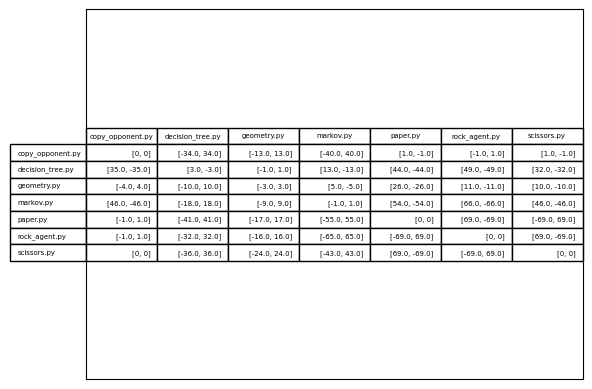

<Figure size 4000x4000 with 0 Axes>

In [45]:
from operator import index
import seaborn as sns

fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
# Table from Ed Smith answer
clust_data = np.rps
collabel=(agents)
rowlabel=(agents)

the_table = ax.table(cellText=clust_data,colLabels=collabel, rowLabels=rowlabel, loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(5)
plt.figure(figsize=(40, 40))
plt.show()

C:\Users\MyPC\AppData\Local\Temp\ipykernel_14948\3871591057.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.barplot(


<Axes: xlabel='Побед', ylabel='None'>

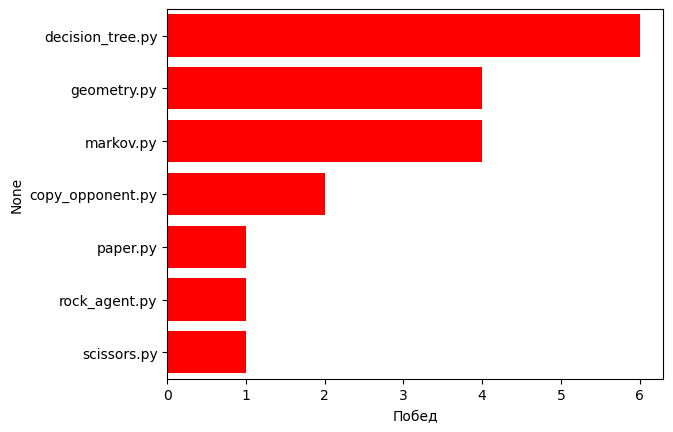

In [46]:
df1 = df
for i in df1.index:
    df1["Агент"] = df1.index

sns.barplot(
    x='Побед',
    y=df1.index,
    #hue="Побед",
    ci=90,
    color='Red',
    saturation=1,
    dodge= False,
    data=df1
)

<Axes: >

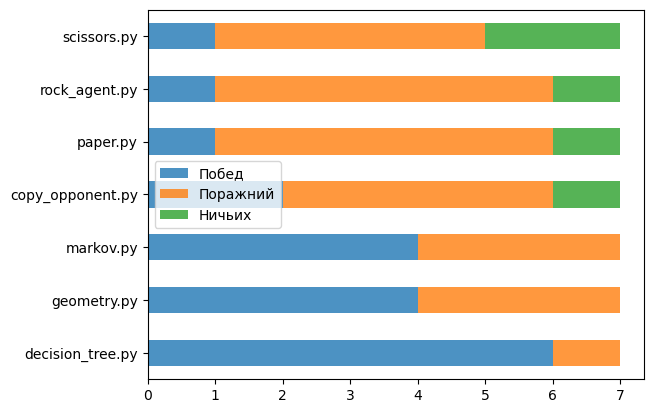

In [47]:

df1.plot.barh(stacked=True, alpha=0.8)